## Variations of the chemical potential

In [1]:
import numpy as np
from scipy.special import comb # number of combinations
import matplotlib.pyplot as plt

### Theory

Comparison between the estimate of the chemical potential by Nicola Calonaci and Bingqing Cheng. Bingqing evaluates the chemical potential at a given concentration based on the Kirkwood-Buff relations.

Bingqing considered a **binary mixture** of A, B particles.

The partial derivatives of $\langle n_A\rangle$ ($\langle ...\rangle$ are always averages on the grand canonical GC ensemble) w.r.t. the chemical potentials $\mu_{A,B}$ are obvious from the grand canonical (GC) partition function.

$\frac{\partial\langle n_A\rangle}{\partial\mu_B} = \beta\langle \Delta n_A \Delta n_B\rangle$

$\frac{\partial\langle n_A\rangle}{\partial\mu_A} = \beta\langle \Delta n_A^2\rangle$.

The "inverse" ones (partial derivatives of the chemical potentials w.r.t. the average n. of particles, which are the concentrations times the volume) are the Kirkwood-Buff relations.

\begin{equation}
\frac{\beta \partial \mu_A}{\partial \langle n_A\rangle}\Big|_{T,p} = \frac{1}{\langle n_A\rangle} \frac{1}{\frac{\langle\Delta n_A^2\rangle}{\langle n_A\rangle}-\frac{\langle \Delta n_A\Delta n_B\rangle}{\langle n_B\rangle}}.
\end{equation}

However, they are not simply related by matrix inversion, why?

- Let's verify these relations to be satisfied by the chemical potential estimated by Nicola: let's consider firstly a purely entropic system and compute the required quantities ($\langle n_{A/B}\rangle, \langle \Delta n_{A/B}^2\rangle, \langle \Delta n_A \Delta n_B\rangle$)

First important difference: in the case-study of Nicola, there is just one type of particles: what distinguishes A from B is only the space region in which the particles are! So, we do not have a binary mixture, just a single type of particles, and we take the averages in a small subregion of the whole system. In this case, the above relations simplify to

$\frac{d n_A}{d \mu_A} = \beta \langle \Delta n_A^2 \rangle$

and the derivative $d\mu_A / d\langle n_A\rangle|_{T, p}$ is just the inverse of the previous one.

### Purely entropic system

with two subregions A, B; $s_{A,B}$ number of sites in A, B; $s_A > s_B$

In [2]:
sA = 10
sB = 40
s_tot = sA + sB

n_tot = 25

Now, simulate the whole system at fixed temperature and pressure, in order to sample its canonical ensemble. In this simple case, just enumerate the n. of microstates with k particles in the subsystem A

In [3]:
def compute_n_microstates(sA, sB, n_tot, verbose=False):

    s_tot = sA + sB

    # 1. compute n. of microstates OmegaA, OmegaB

    OmegaA = {}
    OmegaB = {}

    if n_tot <= sA: kA_list = range(n_tot + 1)
    elif n_tot <= sB: kA_list = range(sA + 1)
    else: kA_list = range(n_tot - sB, sA + 1)

    for kA in kA_list:
        OmegaA[kA] = np.int(comb(sA, kA))
        OmegaB[kA] = np.int(comb(sB, n_tot - kA))

    if verbose:
        print('n. of microstates of A with k particles in A: ', OmegaA)
        print('n. of microstates of B with k particles in A: ', OmegaB)

    # 2. compute n. of microstates of the whole system and pA distribution

    # n. of microstates of A+B system with k particles in subsystem A
    OmegaAB = {}

    for k in OmegaA.keys():
        OmegaAB[k] = OmegaA[k]*OmegaB[k]

    # total n. of possible microstates of A+B system
    OmegaAB_tot = np.sum(list(OmegaAB.values()))

    assert OmegaAB_tot > 0, 'Error: n. of microstates is negative!'

    pA = np.array(list(OmegaAB.values()))/OmegaAB_tot

    return OmegaA, OmegaB, OmegaAB, OmegaAB_tot, pA

In [4]:
OmegaA, OmegaB, OmegaAB, OmegaAB_tot, pA = compute_n_microstates(sA, sB, n_tot)

$p_A$ is the probability for subsystem A to have k particles, which is the product of the probability for subsystem A to be be in one of its microstates with k particles times the n. of its microstates with k particles 

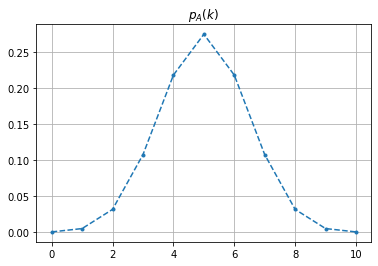

In [5]:
plt.plot(np.arange(len(OmegaA)), pA, '.--')
plt.grid()
plt.title('$p_A (k)$')
plt.show()

Compute $\langle n_A\rangle, \langle n_A^2 \rangle$

In [6]:
def compute_averages(pA):

    av_nA = np.sum([k*pA[k] for k in range(len(pA))])
    av_nA2 = np.sum([(k**2)*pA[k] for k in range(len(pA))])

    dbetamu_davnA = 1/(av_nA2-av_nA**2)

    return av_nA, av_nA2, dbetamu_davnA

In [7]:
av_nA, av_nA2, dbetamu_davnA = compute_averages(pA)

- repeat for different n.s of particles in the whole system (canonical) and compute the variation of chemical potential

$\Delta \mu = \sum_i \frac{\partial\mu}{\partial\langle n\rangle}\Big|_i (d\langle n\rangle)_i$.

This should not depend on the choice of the subregion A.

Compare with the estimate by Nicola.

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
4.939148384077431


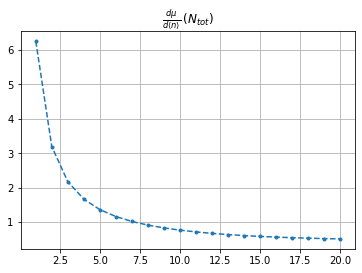

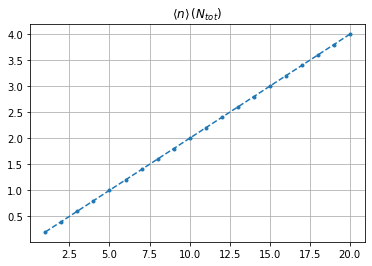

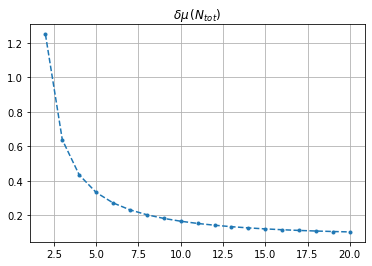

In [8]:
Ns = np.arange(1, 21)

out = {}
out2 = {}

for n_tot in Ns:
    print(n_tot)
    out[n_tot] = compute_n_microstates(sA, sB, n_tot)
    out2[n_tot] = compute_averages(out[n_tot][-1])

dmu_dn_list = [out2[n_tot][2] for n_tot in out2.keys()]

plt.plot(Ns, dmu_dn_list, '.--')
plt.grid()
plt.title(r'$\frac{d\mu}{d\langle n\rangle} \, (N_{tot})$')

av_n = [out2[n_tot][0] for n_tot in out2.keys()]

plt.figure()
plt.plot(Ns, av_n, '.--')
plt.grid()
plt.title(r'$\langle n\rangle \, (N_{tot})$')

delta_avn = np.ediff1d(av_n)
dmu = delta_avn*dmu_dn_list[:-1]

plt.figure()
plt.plot(Ns[1:], dmu, '.--')
plt.grid()
plt.title(r'$\delta\mu \, (N_{tot})$')

mu = np.sum(dmu)
print(mu)

Compare with the definition of chemical potential:

$ \mu(N) := -\frac{\partial S_B(n)}{\beta\partial n}|_N = - \beta^{-1} \log \frac{\Omega_B(N)}{\Omega_B(N-1)}. $

In [9]:
mus = {}

for n_tot in out.keys():

    OmegaB = out[n_tot][1]
    mus[n_tot] = - np.log(OmegaB[0]/OmegaB[1])

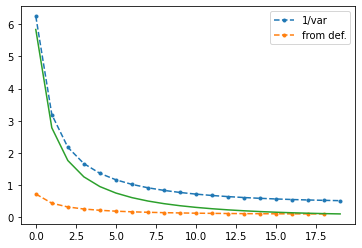

In [14]:
delta_mu = np.ediff1d(list(mus.values()))

plt.plot(dmu_dn_list, '.--', label='1/var')
plt.plot(delta_mu, '.--', label='from def.')

plt.plot(dmu_dn_list - (dmu_dn_list[-1] - delta_mu[-1]))
plt.legend()

Text(0.5, 1.0, '$\\delta\\mu$')

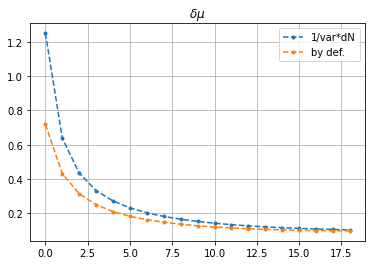

In [12]:
dmu_def = np.ediff1d(list(mus.values()))

plt.plot(dmu, '.--', label='1/var*dN')
plt.plot(dmu_def, '.--', label='by def.')
plt.grid()
plt.legend()
plt.title('$\delta\mu$')
# plt.yscale('log')
# plt.xscale('log')